# Open Loop test

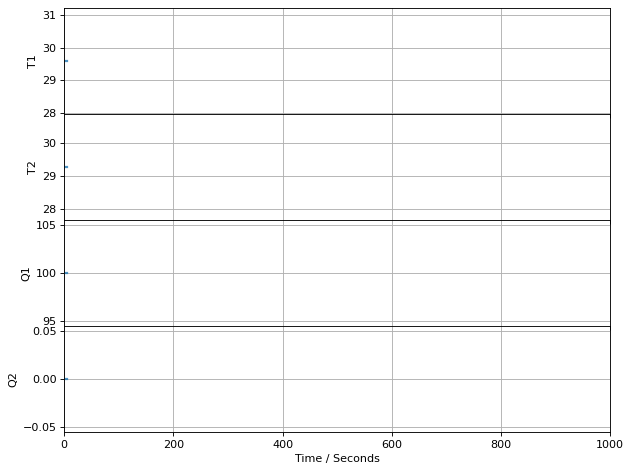

TCLab disconnected successfully.


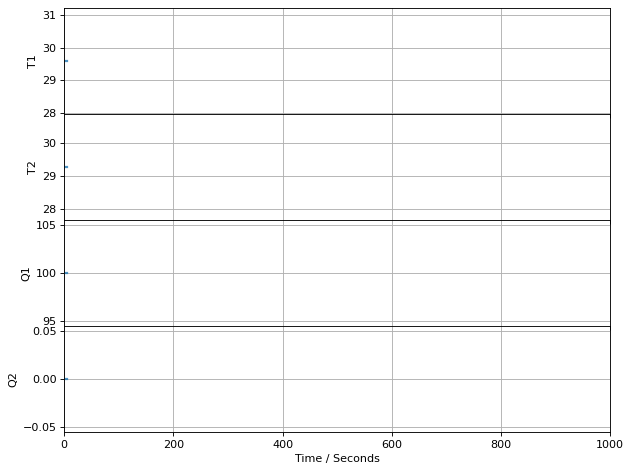

In [18]:
from tclab import TCLab, clock, Historian, Plotter, setup

TCLab = setup(connected=True)

with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, twindow=1000)
    for t in clock(1000):
        lab.Q1(100 if t < 500 else 0)
        p.update(t)

## Static gain

In [ ]:
tss_aprox = 60*15   # 10 minutes aprox stability time
steps = 10
with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, twindow=tss_aprox*steps)
    n = 1
    for t in clock(tss_aprox*steps):
        if t < tss_aprox*n:
            lab.Q1(10*n)
        else:
            n = n + 1
        p.update(t)
    lab.Q1(0)

## Dynamic test

In [ ]:
tss = 15   # 15 minutes stability time
linearization_point = 40  # Percentage input

# Wait to stabilize in the linearization point
with TCLab() as lab:  
    h = Historian(lab.sources)
    p = Plotter(h, twindow=tss*60)
    lab.Q1(linearization_point)
    for t in clock(tss*60):
        p.update(t)
        h.update(t)
        
# Start dynamic test
actuators_values = [45 40 35 40 50 40 30 40]
with TCLab() as lab:
    h = Historian(lab.sources)
    p = Plotter(h, twindow=tss*len(actuators_values)*60)
    n = 1
    for t in clock(tss*len(actuators_values)*60):
        if t < tss*60*n:
            lab.Q1(actuators_values[n-1])
        else:
            n = n + 1
        p.update(t)
    lab.Q1(0)